In [1]:
#Binary classifier using a deep learning neural network

In [3]:
#normal imports and load our csv file into a dataframe
import numpy as np
import pandas as pd

mushrooms_df = pd.read_csv('agaricus-lepiota.csv')
mushrooms_df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
#check the dataframe for missing values
mushrooms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   p       8123 non-null   object
 1   x       8123 non-null   object
 2   s       8123 non-null   object
 3   n       8123 non-null   object
 4   t       8123 non-null   object
 5   p.1     8123 non-null   object
 6   f       8123 non-null   object
 7   c       8123 non-null   object
 8   n.1     8123 non-null   object
 9   k       8123 non-null   object
 10  e       8123 non-null   object
 11  e.1     8123 non-null   object
 12  s.1     8123 non-null   object
 13  s.2     8123 non-null   object
 14  w       8123 non-null   object
 15  w.1     8123 non-null   object
 16  p.2     8123 non-null   object
 17  w.2     8123 non-null   object
 18  o       8123 non-null   object
 19  p.3     8123 non-null   object
 20  k.1     8123 non-null   object
 21  s.3     8123 non-null   object
 22  u       8123 non-null   

In [5]:
#split our original dataframe into a features set and a target set. Our target is column p and all other columns are my features.
features_df = mushrooms_df.drop('p', axis=1)
target_df = mushrooms_df['p']

In [6]:
#check our target df
target_df.head()

0    e
1    e
2    p
3    e
4    e
Name: p, dtype: object

In [7]:
#check our features df
features_df.head()

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
1,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
2,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
3,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
4,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g


In [8]:
#import for creating our training and test sets. Then create our training and test sets with 80% training size.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, train_size=0.8)

In [9]:
#load our imports for onehotencodeing and labelencoding
#In this cell we will labelencode our feature column
#we do this by creating our label encoder object, then calling on the object to fit and transform the data

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()

#y_train_label_encoded = y_train
y_train_label_encoded = label_encoder.fit_transform(y_train)


#y_test_label_encoded = y_test
y_test_label_encoded = label_encoder.fit_transform(y_test)

In [10]:
#Print some values to ensure our label encoder did in fact label encode

print(y_train_label_encoded[0:9])
print(y_test_label_encoded[0:9])

[0 0 0 0 1 0 0 1 1]
[0 1 0 1 0 0 1 1 1]


In [11]:
#We will do the one hot encoding in this cell
#I will set drop to 'first' for best practice and sparse = False to get my dense array
#After creating the object for the onehotencoder, use it and call fit_transform on the training data and just transform on the test data
#I do this because I want the test data to be encoded in the same way as the test data. Calling fit.transform on the test data gave me
# 92 columns instead of 94 like the test data. Using transform created the necessary 94 columns. 
one_hot_encoder = OneHotEncoder(sparse = False, drop = 'first')

#X_train_hot_encoded = X_train
X_train_hot_encoded = one_hot_encoder.fit_transform(X_train)

#X_test_hot_encoded = X_test
X_test_hot_encoded = one_hot_encoder.transform(X_test)

C:\Users\mmice\anaconda3\envs\dtsc680\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
#create our neural network for binary classifiers. 
# I instantiate my model with the Sequential class
# I create my first layer, making sure my input_dim is equal to my new number of features after one hot encoding
# I use the standard output layer with 1 neuron and activation sigmoid
# I use the standard compile parameters for creating a binary classifier. 
# I use the .summary() to check my network.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, activation='relu', input_dim=94))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12160     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


In [15]:
%%time
hist = model.fit(X_train_hot_encoded, y_train_label_encoded, validation_data=(X_test_hot_encoded, y_test_label_encoded), epochs=10, batch_size=100)

# In order to fit my model, I use all of the encoded data, run with 10 epochs, and decide on a batch size of 100.

Epoch 1/10
65/65 [==============================] - 1s 8ms/step - loss: 0.3101 - accuracy: 0.9003 - val_loss: 0.1115 - val_accuracy: 0.9680
Epoch 2/10
65/65 [==============================] - 0s 3ms/step - loss: 0.0699 - accuracy: 0.9849 - val_loss: 0.0358 - val_accuracy: 0.9945
Epoch 3/10
65/65 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9972 - val_loss: 0.0178 - val_accuracy: 0.9975
Epoch 4/10
65/65 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9988 - val_loss: 0.0106 - val_accuracy: 0.9988
Epoch 5/10
65/65 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9991 - val_loss: 0.0071 - val_accuracy: 0.9988
Epoch 6/10
65/65 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9997 - val_loss: 0.0047 - val_accuracy: 0.9994
Epoch 7/10
65/65 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.9998 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 8/10
65/65 [==

[]

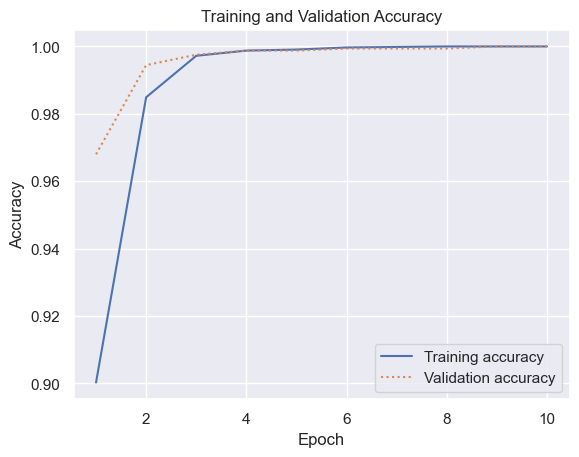

In [16]:
#plotting our training accuracy versus our validation accuracy

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [17]:
#creating our predictions for our confusion matrix and scores

from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, ConfusionMatrixDisplay


sns.reset_orig()
y_predicted = model.predict(X_test_hot_encoded) > 0.5

51/51 [==============================] - 0s 1ms/step


Accuracy: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Precision: 1.0000


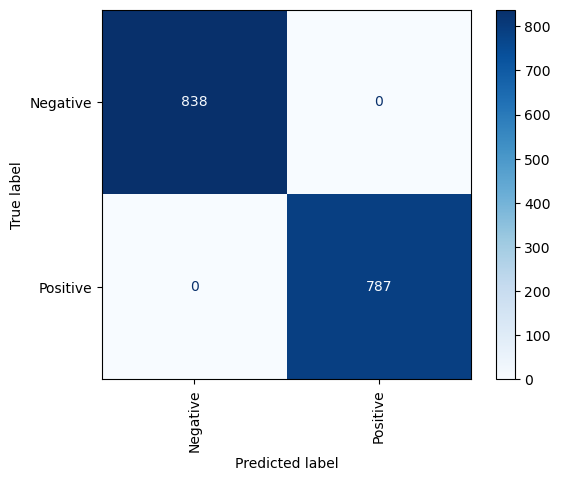

In [18]:
#use our predicted scores versus our y_test encoded data to calculate our scores
# use our predictions versus our y_test encoded data to create our confusion matrix

accuracy = accuracy_score(y_test_label_encoded, y_predicted)
recall = recall_score(y_test_label_encoded, y_predicted)
f1 = f1_score(y_test_label_encoded, y_predicted)
precision = precision_score(y_test_label_encoded, y_predicted)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")


labels = ['Negative', 'Positive']
cmd.from_predictions(y_test_label_encoded, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

In [19]:
#The model performed perfectly according to our confusion matrix

In [20]:
#create a pca model containing 95% if the variation
# In order to do this we use the n_components = paramenter and set it equal to 0.95
# Then we call fit_transform on the training data and just transform on the test data
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca_X_train = pca.fit_transform(X_train_hot_encoded)
pca_X_test =  pca.transform(X_test_hot_encoded)

In [22]:
#create our neural network for our pca data, we follow the same standards as the above neural network. What changes is our input_dims because
#the pca features are less than before. 
pca_model = Sequential()

pca_model.add(Dense(128, activation='relu', input_dim=38))

pca_model.add(Dense(1,activation='sigmoid'))

pca_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
pca_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               4992      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [23]:
%%time
pca_hist = pca_model.fit(pca_X_train, y_train_label_encoded, validation_data=(pca_X_test, y_test_label_encoded), epochs=10, batch_size=100)
#fit our pca_model with our data, our x data is now the pca x data

Epoch 1/10
65/65 [==============================] - 1s 5ms/step - loss: 0.4108 - accuracy: 0.9223 - val_loss: 0.2187 - val_accuracy: 0.9865
Epoch 2/10
65/65 [==============================] - 0s 2ms/step - loss: 0.1411 - accuracy: 0.9826 - val_loss: 0.0830 - val_accuracy: 0.9865
Epoch 3/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9866 - val_loss: 0.0465 - val_accuracy: 0.9908
Epoch 4/10
65/65 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9937 - val_loss: 0.0304 - val_accuracy: 0.9957
Epoch 5/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9965 - val_loss: 0.0217 - val_accuracy: 0.9975
Epoch 6/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9982 - val_loss: 0.0164 - val_accuracy: 0.9975
Epoch 7/10
65/65 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9991 - val_loss: 0.0130 - val_accuracy: 0.9988
Epoch 8/10
65/65 [==

[]

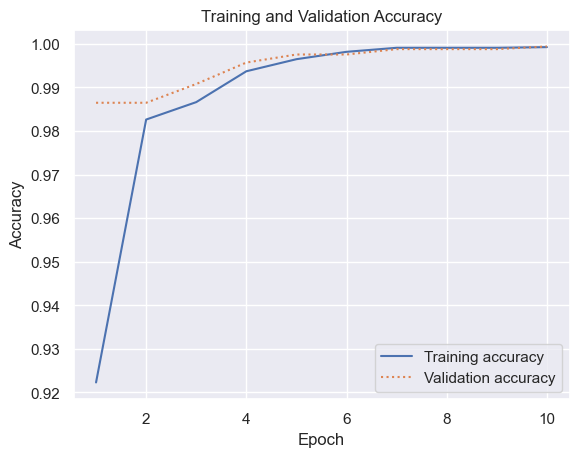

In [25]:
#plotting our training accuracy versus our validation accuracy

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = pca_hist.history['accuracy']
val = pca_hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

51/51 [==============================] - 0s 1ms/step
Accuracy: 0.9994
Recall: 0.9987
F1 Score: 0.9994
Precision: 1.0000


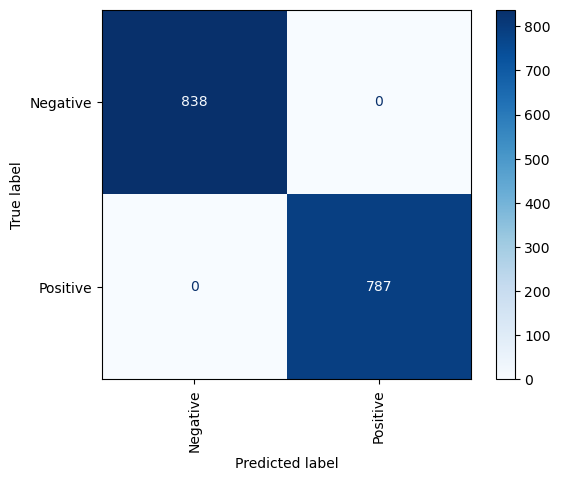

In [26]:
sns.reset_orig()
pca_y_predicted = pca_model.predict(pca_X_test) > 0.5

#use our predicted scores versus our y_test encoded data to calculate our scores
# use our predictions versus our y_test encoded data to create our confusion matrix

accuracy = accuracy_score(y_test_label_encoded, pca_y_predicted)
recall = recall_score(y_test_label_encoded, pca_y_predicted)
f1 = f1_score(y_test_label_encoded, pca_y_predicted)
precision = precision_score(y_test_label_encoded, pca_y_predicted)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")


labels = ['Negative', 'Positive']
cmd.from_predictions(y_test_label_encoded, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

In [28]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(pca_model , file)   

INFO:tensorflow:Assets written to: ram://2c3fe589-20b4-4bfb-b052-e36eb09bd15d/assets
